In [121]:
## Feito por Luis Castanho - 07/03/2024
##
## Este é um projeto pessoal, com o intuito de experimentar a analise de dados,
## utilizando bibliotecas como pandas, ...
## A base utilizada possui informações dos últimos 10 anos do Brasileirão - Serie A (2003 - 2023)

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px 

tabela = pd.read_csv("brasileirao.csv")
#display(tabela)

MATPLOTLIB

Analise dos pontos somados ao longo dos 10 anos por cada time

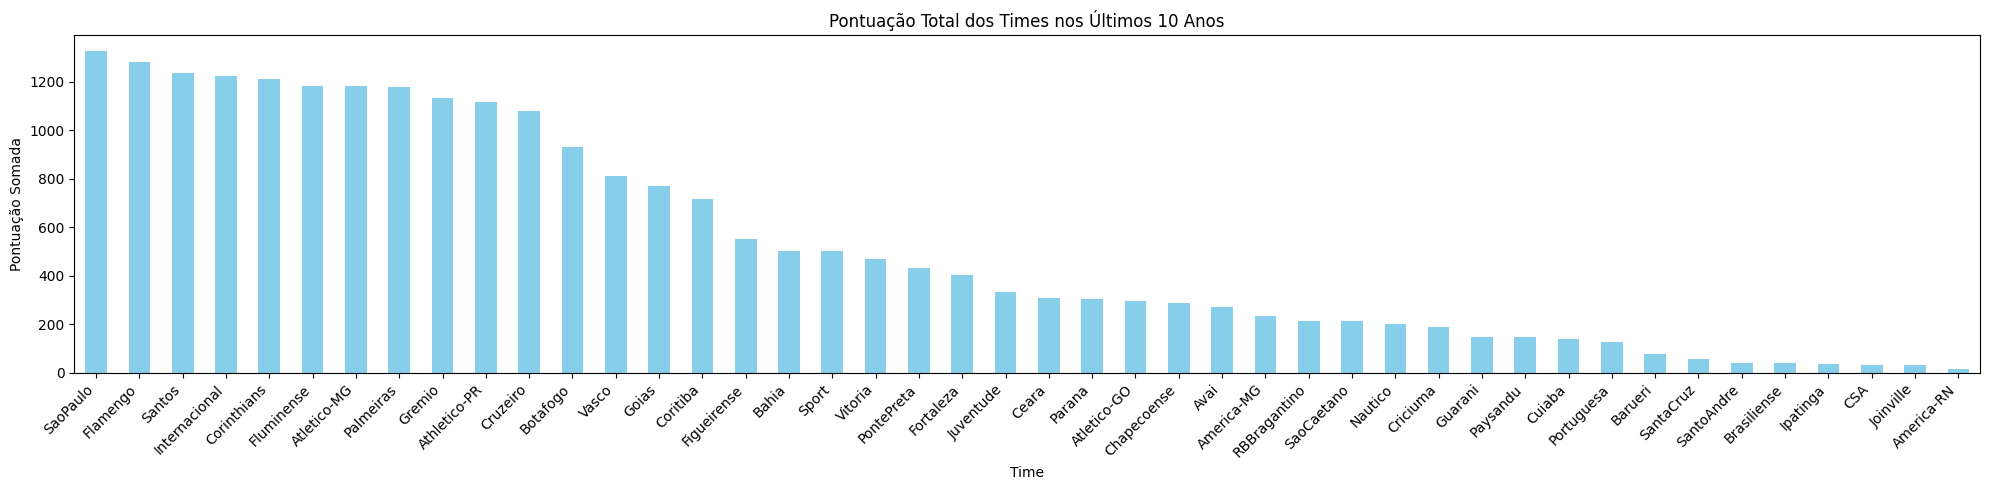

In [122]:


pontuacao_total = tabela.groupby('team')['points'].sum()
pontuacao_total = pontuacao_total.sort_values(ascending=False)

plt.figure(figsize=(20, 5))  # Define o tamanho da figura
pontuacao_total.plot(kind='bar', color='skyblue')  # Cria o gráfico de barras
plt.title('Pontuação Total dos Times nos Últimos 10 Anos')  # Adiciona um título ao gráfico
plt.xlabel('Time')  # Adiciona rótulo ao eixo x
plt.ylabel('Pontuação Somada')  # Adiciona rótulo ao eixo y
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para facilitar a leitura
plt.tight_layout()  # Ajusta o layout para garantir que todos os elementos do gráfico sejam exibidos adequadamente
plt.show()

Analise do desempenho progressivo dos times ao longo dos anos

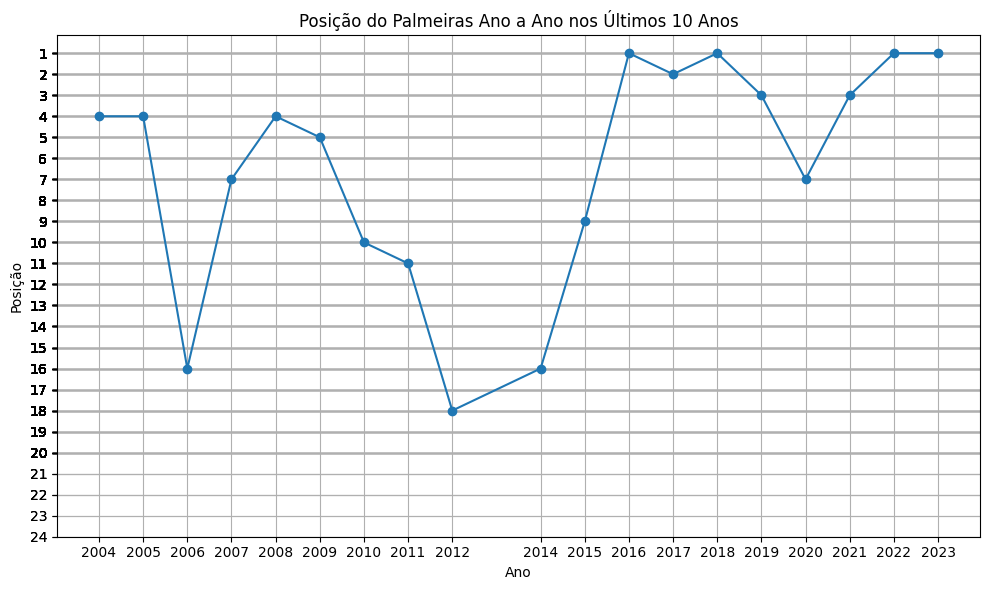

In [126]:
time = 'Palmeiras' 
tabela_time = tabela[tabela['team']== time]

plt.figure(figsize=(10, 6))
plt.plot(tabela_time['season'], tabela_time['place'], marker='o', linestyle='-')
plt.title(f'Posição do {time} Ano a Ano nos Últimos 10 Anos')
plt.xlabel('Ano')
plt.ylabel('Posição')
plt.xticks(tabela_time['season'])  # Define os valores dos ticks no eixo x como todos os anos presentes nos dados
plt.yticks(tabela['place'])
plt.gca().invert_yaxis()  # Inverte a direção do eixo y para ir de 1 a 20
plt.grid(True)
plt.tight_layout()
plt.show()

PLOTLY

Analise dos pontos somados ao longo dos 10 anos por cada time

In [124]:
## Experimentando com plotly

fig = px.bar(x=pontuacao_total.index, y=pontuacao_total.values, 
             labels={'x': 'Time', 'y': 'Pontuação Total'},
             title='Pontuação Total dos Times nos Últimos 10 Anos')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

Analise do desempenho progressivo dos times ao longo dos anos

In [127]:


import plotly.graph_objects as go

time = "Bahia"

tabela_time = tabela[tabela['team']==time]

fig = go.Figure()

fig.add_trace(go.Scatter(x=tabela_time['season'], y=tabela_time['place'], mode='lines+markers', name='Posição'))

fig.update_layout(title=f'Posição do {time} Ano a Ano nos Últimos 10 Anos',
                  xaxis_title='Ano',
                  yaxis_title='Posição', xaxis=dict(tickmode='linear'),
                  yaxis=dict(autorange='reversed',
                      range=[1, 20],  # Define o intervalo de 1 a 20 no eixo y
                      tickvals=list(range(1, 21)),  # Define os valores dos ticks no eixo y
                      tickmode='array'
                  ))

fig.show()  # Exibe o gráfico